In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
from google.colab import files

uploaded = files.upload()

Saving titanic_train.csv to titanic_train (2).csv


In [32]:
train=pd.read_csv("titanic_train.csv")

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


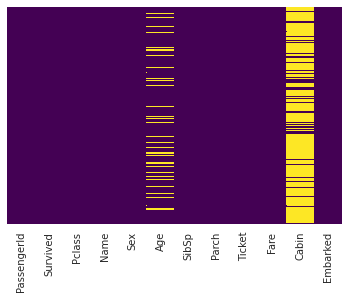

In [35]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [36]:
sns.set_style("whitegrid")

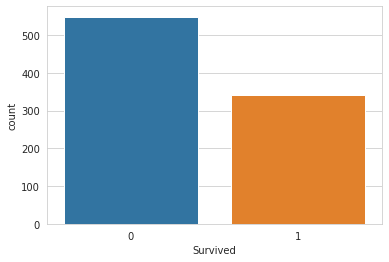

In [37]:
sns.countplot(x="Survived",data=train)

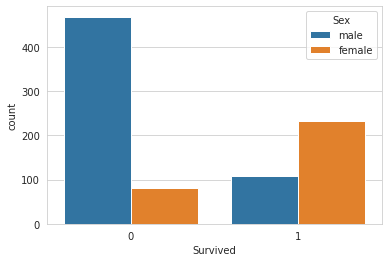

In [38]:
sns.countplot(x="Survived",hue="Sex",data=train)

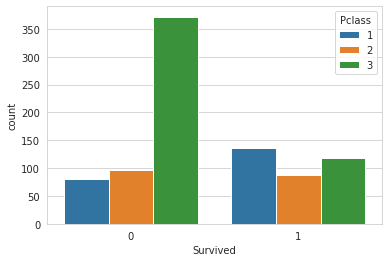

In [39]:
sns.countplot(x="Survived",hue="Pclass",data=train)

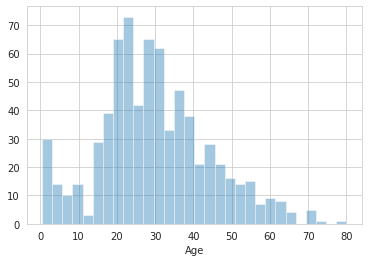

In [40]:
sns.distplot(train["Age"].dropna(),kde=False,bins=30)

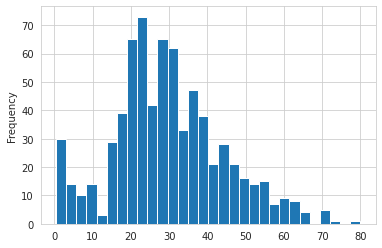

In [41]:
train["Age"].plot.hist(bins=30)

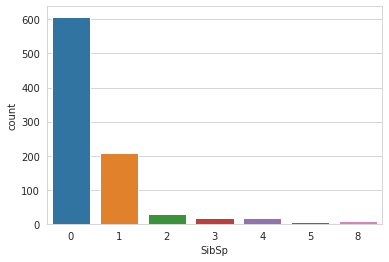

In [42]:
sns.countplot(x="SibSp",data=train)

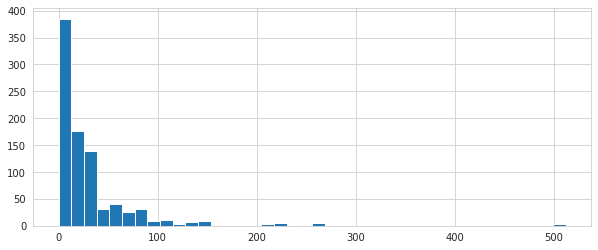

In [43]:
train["Fare"].hist(bins=40,figsize=(10,4))

In [44]:
#same kind of visualization with cufflinks
import cufflinks as cf

In [45]:
cf.go_offline()

In [46]:
train["Fare"].iplot(kind="hist",bins=30)

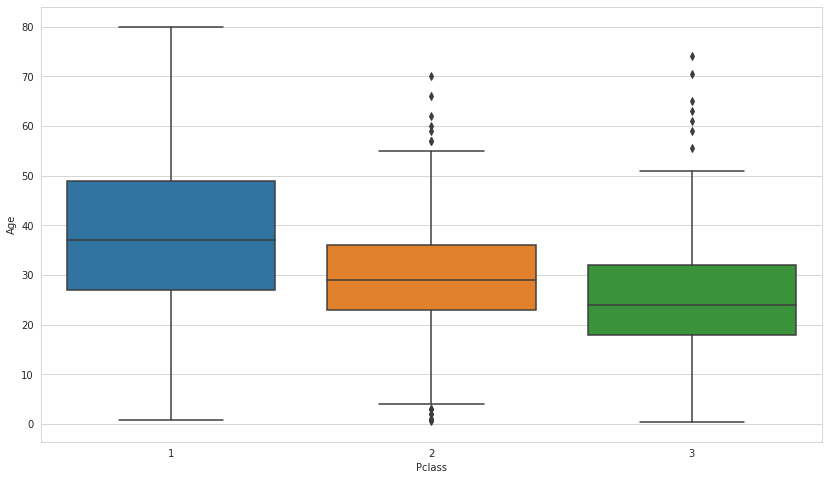

In [47]:
plt.figure(figsize=(14,8))
sns.boxplot(x="Pclass",y="Age",data=train)

In [48]:
#using function to fill the missing values
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 27
    else:
        return Age

In [49]:
train["Age"]=train[["Age","Pclass"]].apply(impute_age,axis=1)

In [50]:
train["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    27.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

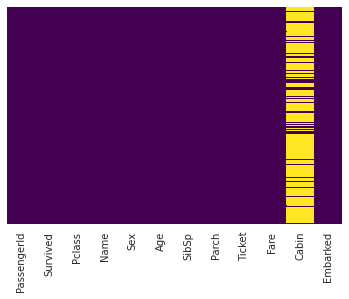

In [51]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [54]:
#Drop unwanted column
train.drop("Cabin",axis=1,inplace=True)

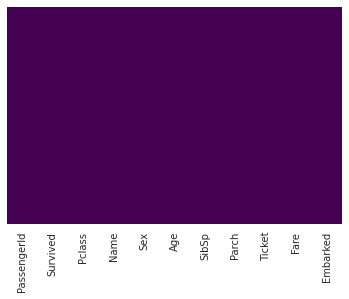

In [55]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [56]:
train.dropna(inplace=True)

In [57]:
#create dummies
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [58]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [59]:
train = pd.concat([train,sex,embark],axis=1)

In [60]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
predictions = logmodel.predict(X_test)

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       163
           1       0.85      0.64      0.73       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test,predictions)

array([[151,  12],
       [ 37,  67]])